In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Employee%20Satisfaction%20Index%20Dataset/Employee%20Satisfaction%20Index.csv")
df.head()

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


In [3]:
df.shape

(500, 14)

In [4]:
df.dtypes

Unnamed: 0           int64
emp_id              object
age                  int64
Dept                object
location            object
education           object
recruitment_type    object
job_level            int64
rating               int64
onsite               int64
awards               int64
certifications       int64
salary               int64
satisfied            int64
dtype: object

In [5]:
df.describe()

,Unnamed: 0,age,job_level,rating,onsite,awards,certifications,salary,satisfied
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,38.610000,3.032000,3.072000,0.466000,4.538000,0.496000,50416.056000,0.526000
std,144.481833,9.438648,1.423738,1.425089,0.499342,2.853215,0.500485,23671.392661,0.499824
min,0.000000,23.000000,1.000000,1.000000,0.000000,0.000000,0.000000,24076.000000,0.000000
25%,124.750000,30.000000,2.000000,2.000000,0.000000,2.000000,0.000000,29805.000000,0.000000
50%,249.500000,39.000000,3.000000,3.000000,0.000000,5.000000,0.000000,42419.000000,1.000000
75%,374.250000,47.000000,4.000000,4.000000,1.000000,7.000000,1.000000,65715.000000,1.000000
max,499.000000,54.000000,5.000000,5.000000,1.000000,9.000000,1.000000,86750.000000,1.000000


In [6]:
df.isnull().sum()

Unnamed: 0          0
emp_id              0
age                 0
Dept                0
location            0
education           0
recruitment_type    0
job_level           0
rating              0
onsite              0
awards              0
certifications      0
salary              0
satisfied           0
dtype: int64

Text(0.5, 1.0, 'Job Satisfaction Correlation')

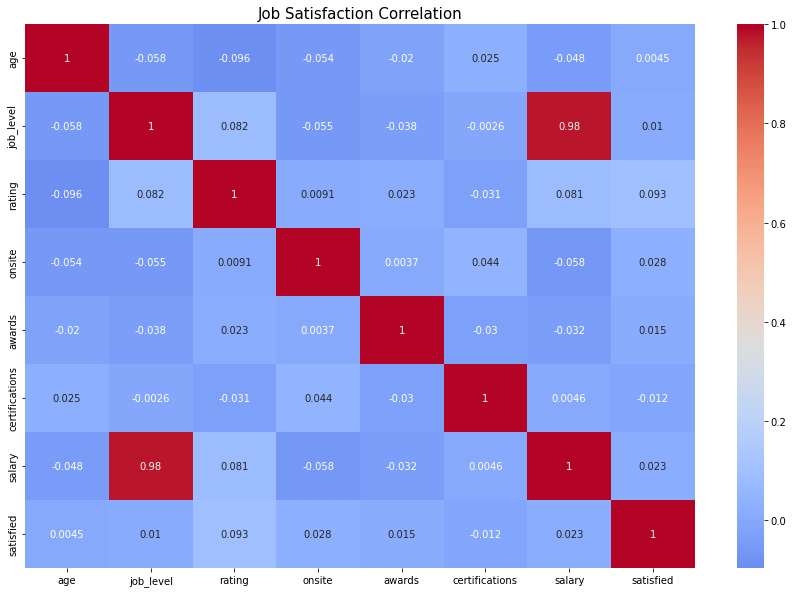

In [7]:
c_df = df.drop(['Unnamed: 0'], axis=1)
plt.figure(figsize=(15,10))
sns.heatmap(c_df.corr(), annot=True, cmap='coolwarm', center = .35)
plt.title('Job Satisfaction Correlation', fontsize=15)

In [8]:
no_neg_df = c_df.drop(['age', 'certifications'], axis=1)
no_neg_df.corr()

,job_level,rating,onsite,awards,salary,satisfied
job_level,1.000000,0.081829,-0.054843,-0.037793,0.977539,0.010093
rating,0.081829,1.000000,0.009079,0.022983,0.081034,0.093024
onsite,-0.054843,0.009079,1.000000,0.003722,-0.057936,0.027637
awards,-0.037793,0.022983,0.003722,1.000000,-0.032339,0.014763
salary,0.977539,0.081034,-0.057936,-0.032339,1.000000,0.023168
satisfied,0.010093,0.093024,0.027637,0.014763,0.023168,1.000000


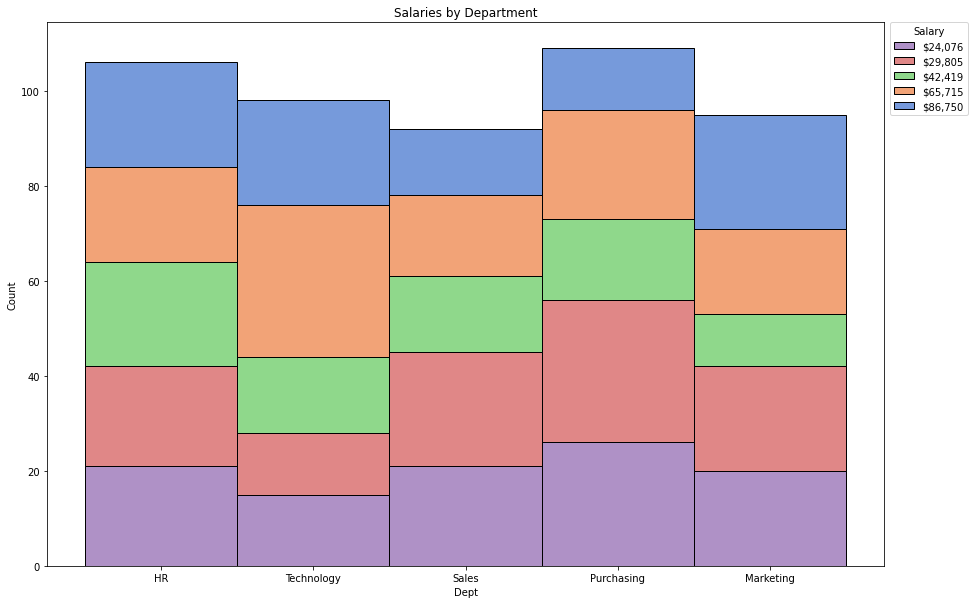

In [9]:
plt.figure(figsize=(15,10))
sns.histplot(data=df,x='Dept',hue='salary', palette='muted', multiple="stack")
plt.title('Salaries by Department')
plt.legend(title='Salary', bbox_to_anchor=(1.1,1), loc=1,borderaxespad=0, 
           labels=['$24,076','$29,805','$42,419','$65,715','$86,750'])

Text(0, 0.5, 'Count of Employees')

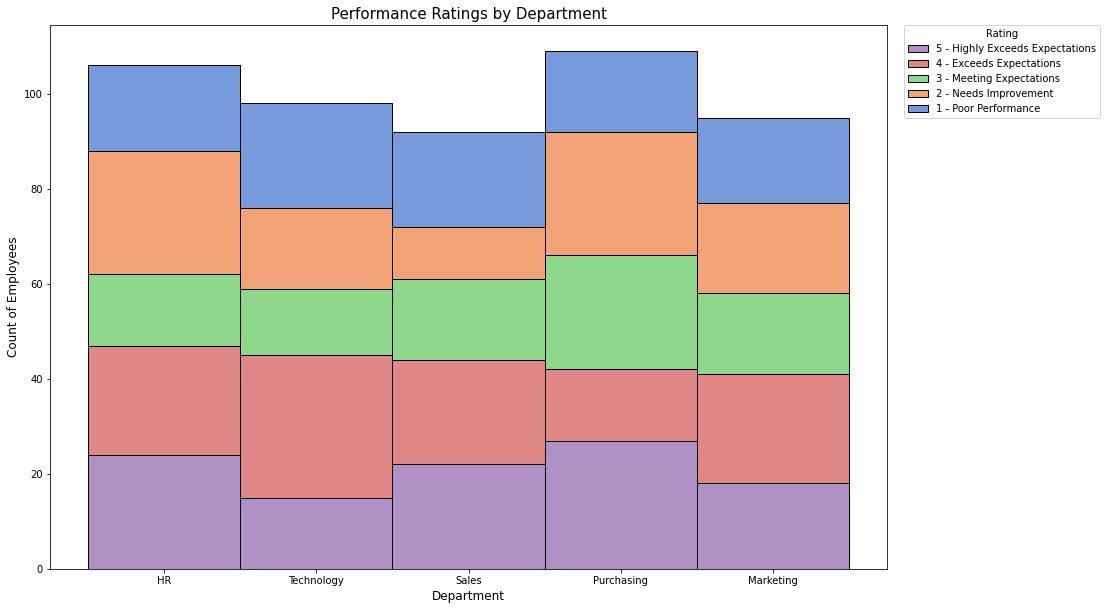

In [10]:
plt.figure(figsize=(15,10))
sns.histplot(data=df,x='Dept', hue='rating', palette='muted', multiple="stack")
plt.title('Performance Ratings by Department', fontsize=15)
plt.legend(title='Rating',bbox_to_anchor=(1.02,1), borderaxespad=0,
           labels=['5 - Highly Exceeds Expectations','4 - Exceeds Expectations',
                '3 - Meeting Expectations','2 - Needs Improvement','1 - Poor Performance'], fontsize=10)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Count of Employees', fontsize=12)

In [11]:
cor_df = c_df.replace(['HR','Technology','Sales', 'Purchasing', 'Marketing',], [1,2,3,4,5])
cor_df = cor_df.replace(['Suburb', 'City'],[1,2])
cor_df = cor_df.replace(['PG','UG'],[1,2])
cor_df = cor_df.replace(['Referral','Walk-in','On-Campus','Recruitment Agency'],[1,2,3,4])

cor_df.head()

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,HR8270,28,1,1,1,1,5,2,0,1,0,86750,1
1,TECH1860,50,2,1,1,2,3,5,1,2,1,42419,0
2,TECH6390,43,2,1,2,1,4,1,0,2,0,65715,0
3,SAL6191,44,3,2,1,3,2,3,1,0,0,29805,1
4,HR6734,33,1,2,2,4,2,1,0,5,0,29805,1


In [12]:
cor_df.corr()

,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
age,1.000000,-0.037190,-0.058575,-0.011481,0.028057,-0.057528,-0.096388,-0.054055,-0.019875,0.025335,-0.048294,0.004490
Dept,-0.037190,1.000000,-0.040262,-0.029791,0.024117,0.059688,0.000783,0.079311,-0.013859,-0.018411,0.070505,-0.009054
location,-0.058575,-0.040262,1.000000,0.092648,0.025834,0.007632,0.026293,0.002455,0.065519,-0.051747,-0.009682,0.030188
education,-0.011481,-0.029791,0.092648,1.000000,0.042855,0.014423,0.054200,0.051037,-0.056629,-0.008129,0.008964,-0.027208
recruitment_type,0.028057,0.024117,0.025834,0.042855,1.000000,0.000031,0.067023,0.063677,0.087501,0.050615,-0.009525,0.026788
job_level,-0.057528,0.059688,0.007632,0.014423,0.000031,1.000000,0.081829,-0.054843,-0.037793,-0.002632,0.977539,0.010093
rating,-0.096388,0.000783,0.026293,0.054200,0.067023,0.081829,1.000000,0.009079,0.022983,-0.030503,0.081034,0.093024
onsite,-0.054055,0.079311,0.002455,0.051037,0.063677,-0.054843,0.009079,1.000000,0.003722,0.043558,-0.057936,0.027637
awards,-0.019875,-0.013859,0.065519,-0.056629,0.087501,-0.037793,0.022983,0.003722,1.000000,-0.030066,-0.032339,0.014763
certifications,0.025335,-0.018411,-0.051747,-0.008129,0.050615,-0.002632,-0.030503,0.043558,-0.030066,1.000000,0.004594,-0.011600


Text(0.5, 1.0, 'Correlation Matrix - Heatmap')

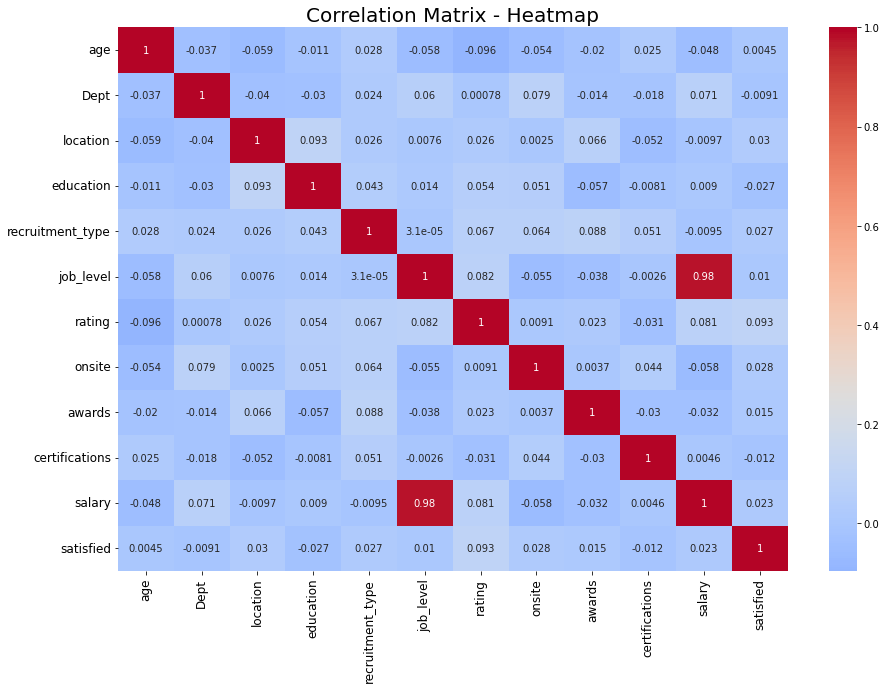

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(cor_df.corr(), annot=True, cmap='coolwarm', center=.25)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation Matrix - Heatmap', fontsize=20)

<AxesSubplot:>

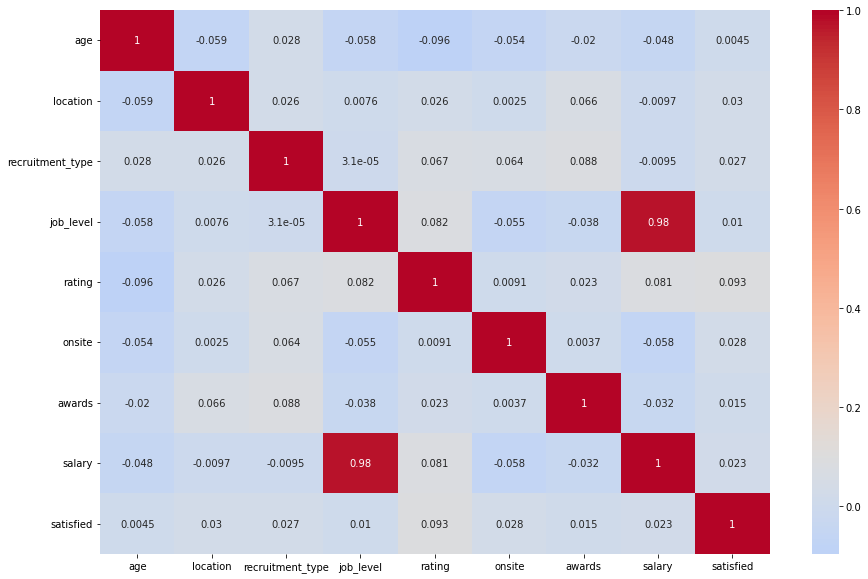

In [14]:
cordf_clean = cor_df.drop(columns=['certifications', 'education', 'Dept'], axis=1)
plt.figure(figsize=(15,10))
sns.heatmap(cordf_clean.corr(), cmap='coolwarm', center=.1, annot=True)

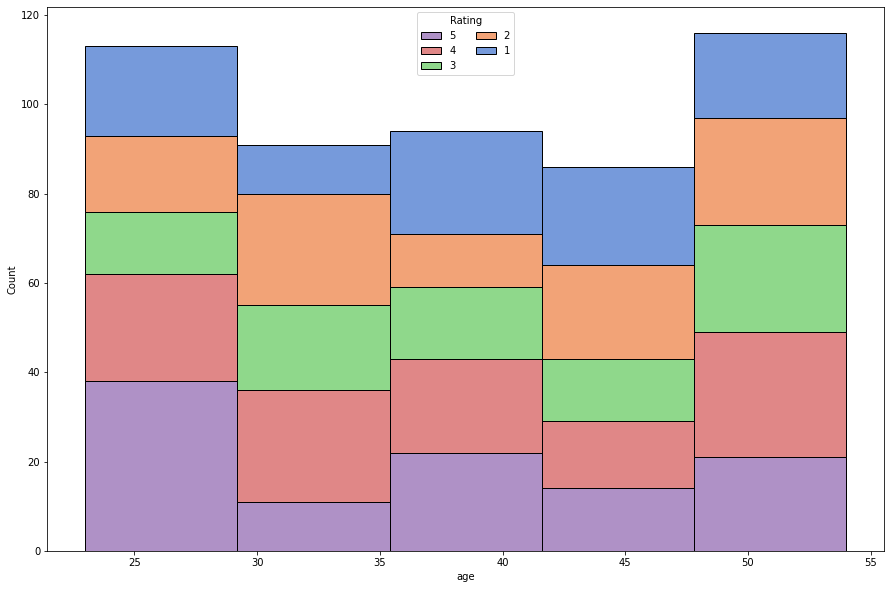

In [15]:
plt.figure(figsize=(15,10))
sns.histplot(data=cordf_clean, x='age', bins=5, hue='rating', multiple='stack', palette='muted')
plt.legend(ncol=2, labels=[5,4,3,2,1], title="Rating")

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'location'}>,
        <AxesSubplot:title={'center':'recruitment_type'}>],
       [<AxesSubplot:title={'center':'job_level'}>,
        <AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'onsite'}>],
       [<AxesSubplot:title={'center':'awards'}>,
        <AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'satisfied'}>]], dtype=object)

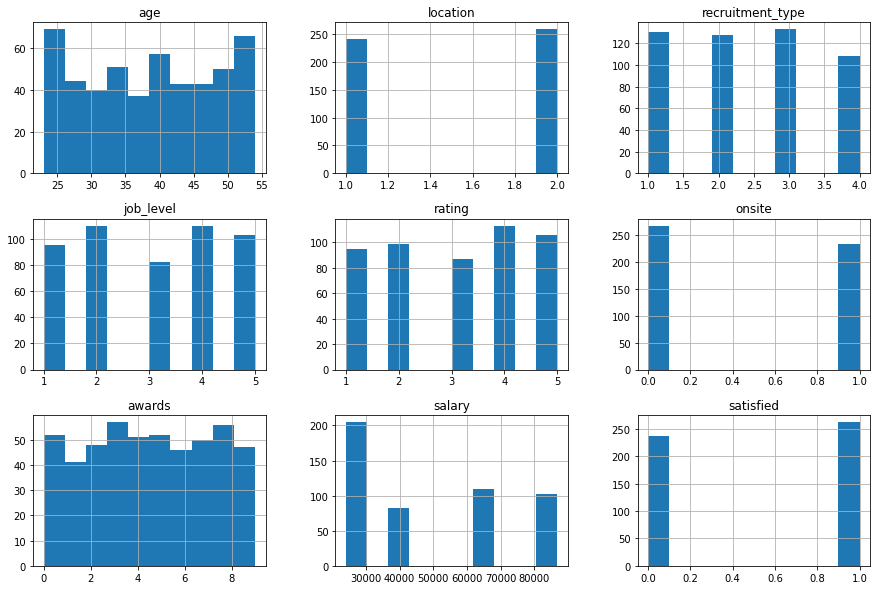

In [16]:
cordf_clean.hist(figsize=(15,10))